### Preliminaries: 

In [65]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [66]:
#GUIDE: 
    #og_df = original df with all data *don't edit* 
    #df = edited df 
    #sex_df = df sorted by sex (with both prompts) 
    # **gen_df = subset of data with only gender x general prompt **
    # ** ang_df = subset of data with only gender x anger prompt **
    
#This may be way too many dataframes, I'm sorry. The main ones we should be using for now should be the last two 

In [67]:
og_df = pd.read_csv("proj_responses.csv")  #load in dataframe 

In [68]:
df = og_df.copy()   #make copy of df to manipulate 

### Wrangling: 

In [69]:
df = df.drop('Timestamp', axis = 1) #remove timestamp column 
df = df.drop(index = [18, 37]) 

#ignore error msgs 

In [70]:
## binarizing gender column: men = 0, women = 1 
sex_df = df.sort_values("Sex").reset_index()  #sort by gender 
sex_df.loc[0:20, 'Sex'] = 1  #rows 0-20 = 1 for woman
sex_df.loc[21:, 'Sex'] = 0 #rows 21 to end = 0 for man

In [71]:
#making df for general prompt and anger prompt: 
gen_df = df[["Sex", "General Prompt"]]
ang_df = df[["Sex", "Anger Prompt"]]

print(len(gen_df))
print(len(ang_df))

43
43


### Data Visualizations: 

<AxesSubplot:xlabel='Age', ylabel='Count'>

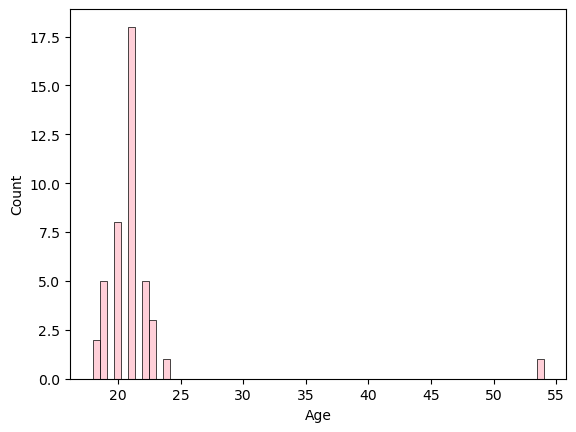

In [72]:
#age hist
sns.histplot(data = df, x = "Age", color = 'pink')

<AxesSubplot:xlabel='word count (prompt 1)', ylabel='Count'>

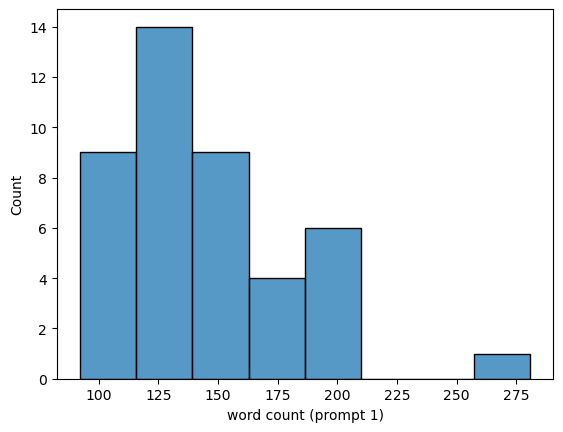

In [73]:
#gen prompt hist
sns.histplot(data= df, x = "word count (prompt 1)")

<AxesSubplot:xlabel='word count (prompt 2)', ylabel='Count'>

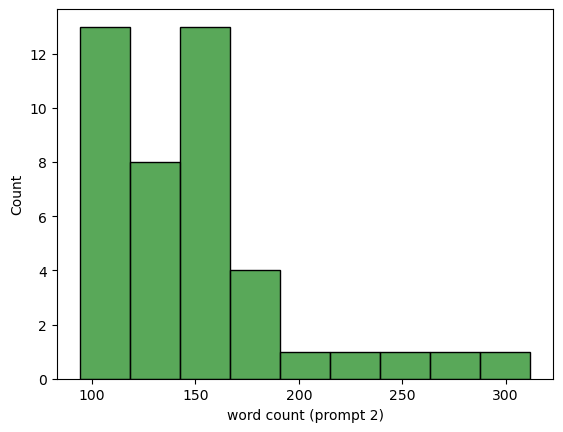

In [74]:
#anger prompt hist
sns.histplot(data= df, x = "word count (prompt 2)", color = 'forestgreen')

### Processing the Text

In [75]:
#import packages
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.casual import TweetTokenizer
ttokenizer = TweetTokenizer() 

In [76]:
#tokenize our general responeses
gen_prompt_list = [] 
for entry in gen_df["General Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    gen_prompt_list.append(tokenized_entry)

In [77]:
#tokenize our angry responeses
ang_prompt_list = [] 
for entry in ang_df["Anger Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    ang_prompt_list.append(tokenized_entry)

### Cleaning entries

In [78]:
#removing stop words
import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag

all_responses = gen_prompt_list + ang_prompt_list

responses_without_stop = []

for entry in all_responses:
    text_with_stop_words = entry
    text_without_stop_words = [word for word in text_with_stop_words if word not in stopwords.words("english")]
    responses_without_stop.append(text_without_stop_words)
    
#create lists to store unigram frequency
unigram_freqs = []

#for each tweet, calculate n-grams and frequency, then store in respective list 
for entry in responses_without_stop: 
    unigram_frequency_distribution = nltk.FreqDist(entry)
    unigrams = [ (unigram, unigram_frequency_distribution[unigram]) for unigram in unigram_frequency_distribution ]
    unigram_freqs.append(unigrams)
    
#create individual lists for unigram and bigram vocabularies
unigram_vocab = []

#for each tweet, add every unigram to the unigram vocab
for entry in unigram_freqs:
    for x in entry:
        unigram = x[0]
        unigram_vocab.append(unigram)

#remove duplicate entries and sort
unigram_vocab = sorted(list(set(unigram_vocab)))

#create empty lists
unigram_features = []

#feature array for unigrams 
for entry in unigram_freqs:
    #instantiate list with default freq 0 and length of vocab
    freqs = [0] * len(unigram_vocab)
    #for each unigram in tweet, replace frequency in instance list with frequency
    for x in entry:
        unigram = x[0]
        freq = x[1]
        freqs[unigram_vocab.index(unigram)] = freq
    #append instance frequency list to features array
    unigram_features.append(freqs)

#use this code to ensure we have iterated through each tweet and each entry has the correct length    
#print(len(unigram_features))
#print(len(unigram_features[5]))    

### Predictive Model based on Unigrams

In [79]:
gender = list(gen_df["Sex"]) + list(ang_df["Sex"])

In [82]:
#sanity check
#print(len(gender))
#print(len(unigram_features))

#now we want to split into our train and test set --> we will be working with approximately an 80/20 split for train vs. test 
#given the size of our dataset, we will be using 68 entries to train the model and testing on 18
#we are going to use the first 34 responses for each prompt to train 

#NOTE I DID THIS REALLY POORLY BC I WAS LAZY -- FEEL FREE TO FIX 

train_features = []
test_features = []
train_labels = []
test_labels = []

for x in range(34):
    train_features.append(unigram_features[x])
    train_labels.append(gender[x])
for x in range(34, 43):
    test_features.append(unigram_features[x])
    test_labels.append(gender[x])
for x in range(43, 78):
    train_features.append(unigram_features[x])
    train_labels.append(gender[x])
for x in range(78, 86):
    test_features.append(unigram_features[x])
    test_labels.append(gender[x])

#sanity check
#print(train_features)
print(train_labels)
#print(test_features)
print(test_labels)

#HIIII so the error here is that the gender wasn't binarized in a way that it correlated -- if you can fix it somehow
#so that the gender is binarized and correlates to the entries 

['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female']
['Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female']
['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',

In [81]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix)
import sys

#this will make our arrays print in their entirety instead of truncating
np.set_printoptions(threshold=sys.maxsize)

#using L2 regularisation
lm_log = LogisticRegression().fit(train_features, train_labels)

#print(lm_log.intercept_)
#print(lm_log.coef_)

test_pred = lm_log.predict(test_features)  
print(test_pred)
test_pred_round = np.round(test_pred)

#print accuracy and confusion matrix
print('Test accuracy: ', accuracy_score(test_labels, test_pred_round))
print ("Confusion Matrix : \n", confusion_matrix(test_labels, test_pred_round) ) 

['Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female' 'Female'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female']


TypeError: ufunc 'rint' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''